<a href="https://colab.research.google.com/github/joegullo5/CorbyRowKickoffDarty2022/blob/main/MLALG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import json
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas
import tensorflow as tf
from sklearn import model_selection
import torch

#data filepath
DATA_PATH = "/content/drive/MyDrive/MLPROJECT/notpie.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [166]:
def load_data(data_path):
    """Loads data dataset from csv file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """
    #data filepath
    filepath = data_path

    #import csv using pandas to format into dataframe
    with open(filepath, 'r') as f:
        data = pandas.read_csv(f, header=None)

    #print(data.head())
    #randomize te rows of the dataframe
    data = normalize_data(data)
    data = data.sample(frac=1)
    #load all columns except the last one into x
    x = np.array(data.iloc[:, :-1])
    y = np.array(data.iloc[:, -1])
    
    #print("Data succesfully loaded!")

    return  x,y

In [167]:
def normalize_data(data):
    for i in range((len(data.columns)-1)):
        num = data[i].max()
        if num < 1:
            continue
        if num < 10:
            data[i] = (data[i]) / (10)
        elif num < 100:
            data[i] = (data[i]) / (100)
        elif num < 1000:
            data[i] = (data[i]) / (1000)
        else:
            print("Error in normalization! Please check!")
    return data

In [169]:
x, y = load_data("/content/drive/MyDrive/MLPROJECT/fd3.csv")
train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid() 
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.sigmoid(output)
        return output

#convert to tensors
training_input = torch.FloatTensor(x_train)
training_output = torch.FloatTensor(y_train)
test_input = torch.FloatTensor(x_test)
test_output = torch.FloatTensor(y_test)

input_size = training_input.size()[1] # number of features selected
hidden_size = 20 # number of nodes/neurons in the hidden layer
model = Net(input_size, hidden_size) # create the model
criterion = torch.nn.BCELoss() # works for binary classification
# without momentum parameter
optimizer = torch.optim.SGD(model.parameters(), lr = 0.9) 
#with momentum parameter
optimizer = torch.optim.SGD(model.parameters(), lr = 0.9, momentum=0.25)

[[0.09245 0.3325  0.786   ... 0.069   0.095   0.094  ]
 [0.0972  0.349   0.8255  ... 0.0955  0.103   0.1    ]
 [0.09725 0.3515  0.8295  ... 0.098   0.11    0.108  ]
 ...
 [0.1102  0.372   0.8205  ... 0.125   0.126   0.121  ]
 [0.1115  0.3745  0.835   ... 0.1465  0.116   0.118  ]
 [0.1126  0.4165  0.889   ... 0.142   0.116   0.131  ]]
[1 1 1 ... 1 0 0]


In [185]:
model.load_state_dict(torch.load('/content/drive/MyDrive/MLPROJECT/best2.pth'))
model.train()
epochs = 5000
errors = []
for epoch in range(epochs):
    
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(training_input)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), training_output)
    errors.append(loss.item())
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()


def accuracy(model, inp, out):
  # ds is a iterable Dataset of Tensors
  # one item at a time version
  model.load_state_dict(torch.load('/content/drive/MyDrive/MLPROJECT/best2.pth'))
  guesses = []
  guess = ()
  n_correct = 0; n_wrong = 0

  for i in range(len(inp)):
    inpts = inp[i]
    target = out[i]   # float32  [0.0] or [1.0]
    with torch.no_grad():
      oupt = model(inpts)
    guess = (target, oupt.round())

    # avoid 'target == 1.0'
    if guess[0]==guess[1]:
      n_correct += 1
    else:
      n_wrong += 1

  return (n_correct * 1.0) / (n_correct + n_wrong)

acc = accuracy(model,test_input,test_output)
print(f'Accuracy: {acc}')

Streaming output truncated to the last 5000 lines.
Epoch 1: train loss: 0.44279131293296814
Epoch 2: train loss: 0.3764791786670685
Epoch 3: train loss: 0.3958619236946106
Epoch 4: train loss: 0.3709210455417633
Epoch 5: train loss: 0.4124215543270111
Epoch 6: train loss: 0.39766156673431396
Epoch 7: train loss: 0.46247637271881104
Epoch 8: train loss: 0.42699089646339417
Epoch 9: train loss: 0.4900936782360077
Epoch 10: train loss: 0.41747549176216125
Epoch 11: train loss: 0.4540849030017853
Epoch 12: train loss: 0.3909754157066345
Epoch 13: train loss: 0.4193398952484131
Epoch 14: train loss: 0.3841320276260376
Epoch 15: train loss: 0.4252902567386627
Epoch 16: train loss: 0.3972679078578949
Epoch 17: train loss: 0.45151084661483765
Epoch 18: train loss: 0.41479283571243286
Epoch 19: train loss: 0.4715404808521271
Epoch 20: train loss: 0.4145137667655945
Epoch 21: train loss: 0.4582235813140869
Epoch 22: train loss: 0.3993871212005615
Epoch 23: train loss: 0.43507471680641174
Epoch 2

In [178]:
game1 = x[0]
wL = y[0]
print(x.shape)
print(game1)
print(wL)
torch.save(model.state_dict(), '/content/drive/MyDrive/MLPROJECT/.pth')
model.load_state_dict(torch.load('/content/drive/MyDrive/MLPROJECT/best.pth'))
oupt = model(torch.FloatTensor(game1))
print(oupt.item())
model.eval()

(5189, 54)
[0.09245 0.3325  0.786   0.081   0.241   0.1785  0.2265  0.093   0.305
 0.186   0.079   0.51    0.13    0.229   0.09355 0.326   0.7375  0.0885
 0.2535  0.195   0.262   0.0765  0.3175  0.187   0.54    0.2105  0.08305
 0.3155  0.7665  0.07    0.221   0.1295  0.179   0.0985  0.306   0.1855
 0.057   0.505   0.1175  0.16    0.0882  0.339   0.767   0.21    0.135
 0.178   0.09    0.3185  0.192   0.53    0.1675  0.069   0.095   0.094  ]
1
0.7509796619415283


Net(
  (fc1): Linear(in_features=54, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

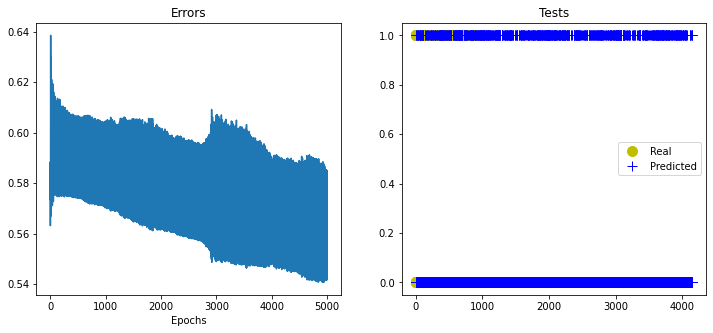

In [177]:
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(test_output.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy().round(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()

plotcharts(errors)




In [ ]:
model.eval()
y_pred = model(test_input)
after_train = criterion(y_pred.squeeze(), test_output)
print('Test loss after training' , after_train.item())

Test loss after training 0.6596518158912659


In [120]:
def accuracy(model, inp, out):
  # ds is a iterable Dataset of Tensors
  # one item at a time version
  n_correct = 0; n_wrong = 0

  for i in range(len(inp)):
    inpts = inp
    target = test_output   # float32  [0.0] or [1.0]
    with torch.no_grad():
      oupt = model(inpts)

    # avoid 'target == 1.0'
    if (target < 0.5)  (oupt = 0.5) and (oupt >= 0.5):
      n_correct += 1
    else:
      n_wrong += 1

  return (n_correct * 1.0) / (n_correct + n_wrong)

  print(accuracy(model))

In [121]:
acc = accuracy(model,test_input,test_output)
print(acc)

TypeError: ignored